In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessing and Modeling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score
)

In [2]:
print("Loading the processed data from 'processed_water_disease_data.csv'...")
df_model = pd.read_csv('processed_water_disease_data.csv')
df_model.head()

Loading the processed data from 'processed_water_disease_data.csv'...


,Month_July,Month_June,Month_October,Month_September,WaterSourceType_HandPump,WaterSourceType_OpenWell,WaterSourceType_RainwaterHarvest,WaterSourceType_River,Rainfall_mm,AvgTemperature_C,Water_pH,Turbidity_NTU,Chlorine_mg_L,BacterialPresence,EColi_MPN,OutbreakStatus
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,324.8,26.6,7.32,10.0,0.43,1.0,87.0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,138.3,25.3,6.74,5.9,0.22,1.0,21.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,190.8,22.4,6.79,5.5,0.29,1.0,174.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,193.0,26.9,7.18,7.8,0.75,1.0,166.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,120.0,26.1,6.70,10.7,0.50,1.0,34.0,2


In [3]:
X = df_model.drop('OutbreakStatus', axis=1)
y = df_model['OutbreakStatus']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y 
)


In [5]:

print(f"Class distribution before SMOTE: {Counter(y_train)}")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")

Class distribution before SMOTE: Counter({1: 1748, 0: 1607, 2: 395})
Class distribution after SMOTE: Counter({1: 1748, 0: 1748, 2: 1748})


In [6]:
class_names = ['High_Risk', 'Low_Risk', 'Medium_Risk']
def evaluate_performance(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    print("--- Classification Report ---\n")
    print(classification_report(y_true, y_pred, target_names=class_names))
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=10000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

In [8]:
params = {
    "LogisticRegression": {
        'C': [0.1, 1.0, 10], 'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2']
    },
    "RandomForest": {
        'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]
    },
    "SVC": {
        'C': [0.1, 1], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']
    },
    "GradientBoosting": {
        'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]
    }
}

========== Tuning Hyperparameters for LogisticRegression ==========
Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\tarun\OneDrive\Desktop\ml_model-SIH\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.9037

--- Evaluating Best LogisticRegression Model on Test Data ---
Accuracy: 0.9152
F1-Score: 0.9207

--- Classification Report ---

              precision    recall  f1-score   support

   High_Risk       0.98      0.84      0.90       536
    Low_Risk       0.98      1.00      0.99       582
 Medium_Risk       0.57      0.84      0.68       132

    accuracy                           0.92      1250
   macro avg       0.84      0.89      0.86      1250
weighted avg       0.94      0.92      0.92      1250


--- Confusion Matrix ---


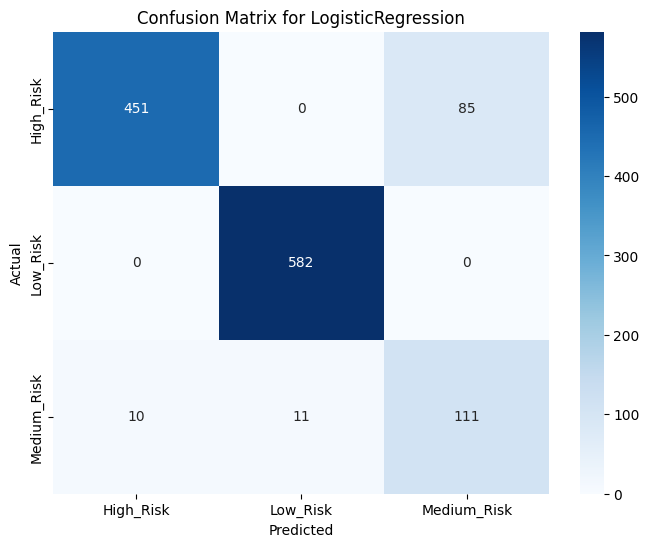


========== Tuning Hyperparameters for RandomForest ==========
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 0.9418

--- Evaluating Best RandomForest Model on Test Data ---
Accuracy: 0.9376
F1-Score: 0.9368

--- Classification Report ---

              precision    recall  f1-score   support

   High_Risk       0.94      0.93      0.94       536
    Low_Risk       0.98      1.00      0.99       582
 Medium_Risk       0.71      0.68      0.70       132

    accuracy                           0.94      1250
   macro avg       0.88      0.87      0.88      1250
weighted avg       0.94      0.94      0.94      1250


--- Confusion Matrix ---


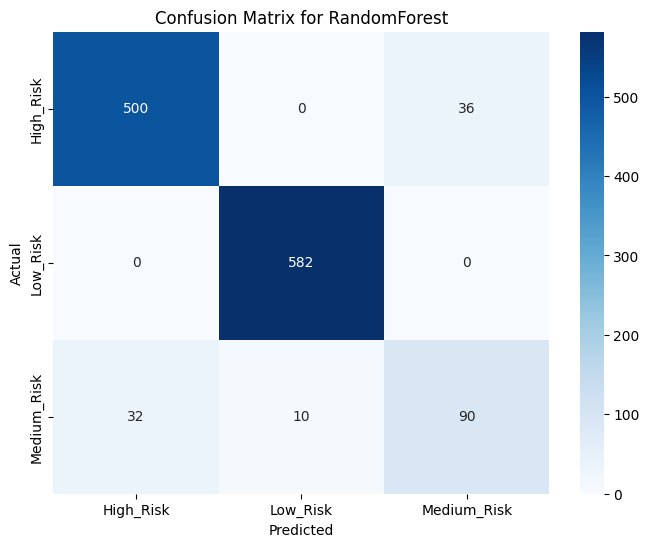


========== Tuning Hyperparameters for SVC ==========
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-validation Score: 0.8291

--- Evaluating Best SVC Model on Test Data ---
Accuracy: 0.7656
F1-Score: 0.7505

--- Classification Report ---

              precision    recall  f1-score   support

   High_Risk       0.79      0.90      0.84       536
    Low_Risk       0.82      0.79      0.80       582
 Medium_Risk       0.21      0.12      0.15       132

    accuracy                           0.77      1250
   macro avg       0.60      0.60      0.60      1250
weighted avg       0.74      0.77      0.75      1250


--- Confusion Matrix ---


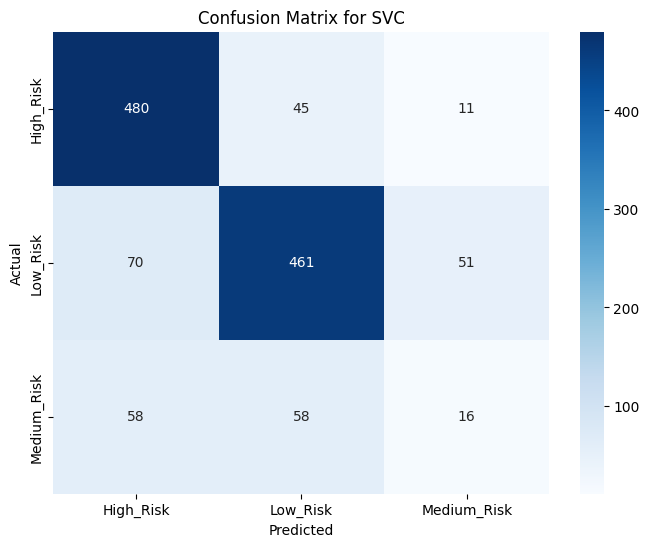


========== Tuning Hyperparameters for GradientBoosting ==========
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Cross-validation Score: 0.9401

--- Evaluating Best GradientBoosting Model on Test Data ---
Accuracy: 0.9488
F1-Score: 0.9497

--- Classification Report ---

              precision    recall  f1-score   support

   High_Risk       0.97      0.93      0.95       536
    Low_Risk       0.99      0.99      0.99       582
 Medium_Risk       0.73      0.81      0.77       132

    accuracy                           0.95      1250
   macro avg       0.90      0.91      0.90      1250
weighted avg       0.95      0.95      0.95      1250


--- Confusion Matrix ---


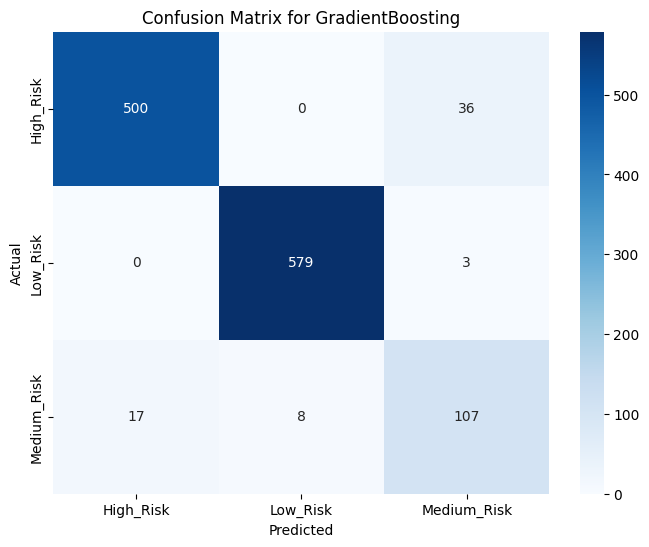

In [9]:
best_models = {}
for model_name, model in models.items():
    print(f"========== Tuning Hyperparameters for {model_name} ==========")
    model_params = params[model_name]
    gs = GridSearchCV(model, model_params, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
    gs.fit(X_train_resampled, y_train_resampled)
    
    print(f"\nBest Parameters: {gs.best_params_}")
    print(f"Best Cross-validation Score: {gs.best_score_:.4f}")
    
    best_models[model_name] = gs.best_estimator_
    
    print(f"\n--- Evaluating Best {model_name} Model on Test Data ---")
    y_pred = gs.best_estimator_.predict(X_test)
    evaluate_performance(y_test, y_pred, model_name)
    print("="*60 + "\n")
    

In [ ]:
import joblib
best_final_model = best_models['GradientBoosting']
joblib.dump(best_final_model, 'outbreak_prediction_model.joblib')
print("✅ Final model saved to outbreak_prediction_model.joblib")
